Tutorial from: https://www.kaggle.com/datasets/mzeeshan786/iris-dataset

In [20]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy import stats

### Visualizing Data Set

In [3]:
# Load DataSet

df = pd.read_csv('IRIS.csv')
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


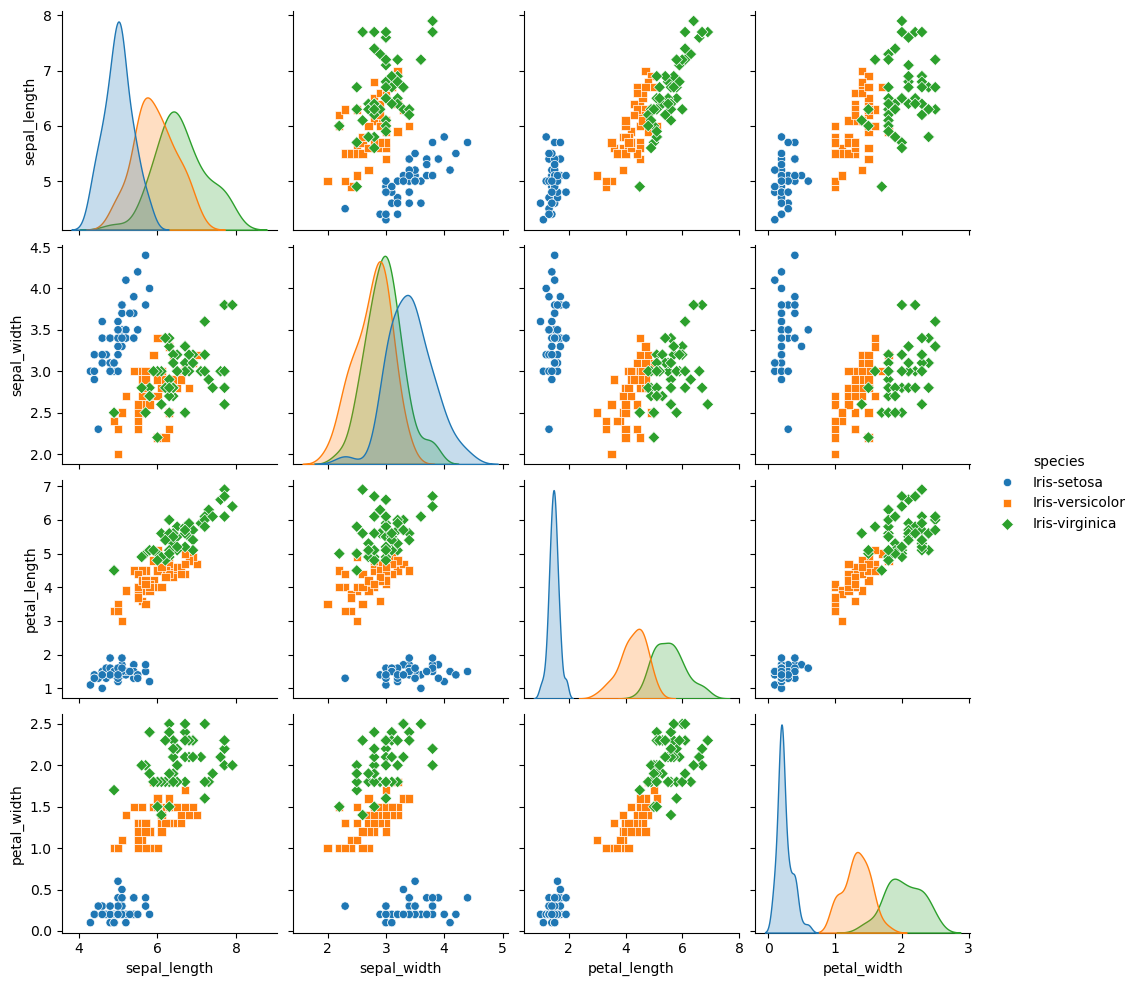

In [7]:
# Visualize the distribution of each feature
sns.pairplot(df, hue='species', markers=["o", "s", "D"])

<Axes: >

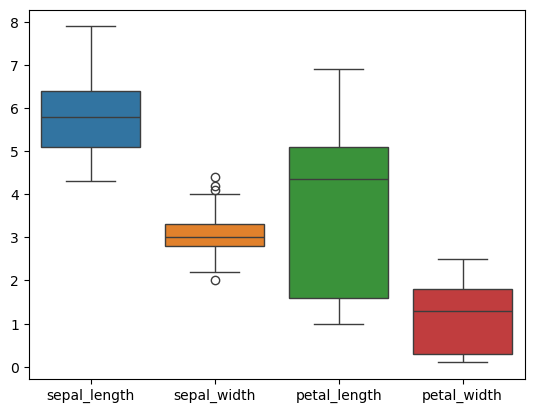

In [8]:
# Visualize of outliers with box plot
sns.boxplot(data=df)

In [9]:
df['species'] = df['species'].astype('category')
df.drop('species', axis=1).mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [10]:
# Detect outliers using z-score from scipy import stats
z_score = stats.zscore(df.drop('species',axis=1))
abs_z_score = np.abs(z_score)
outliers = (abs_z_score > 3).all(axis=1)

    # What does the z-score calculates?
    #ans: calculates (xi-mean)/stdDeviation. verifies how many standard deviation the point is from one of the column

    # What is the .all(axis=1) making?
    # ans: .all(axis=1) = True only if all columns in that row are outliers
    
#remove outliers
df = df[~outliers]

    # how the "~" works here? 
    #ans: boolean for NOT. keepong only non-outlier rows

### Training model

In [11]:
# Split the dataset in features and labels
X = df.drop('species', axis=1)
y = df['species']

In [12]:
# Split the dataset in test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# initialize Classifiers
knn = KNeighborsClassifier(1)

# Train the model
knn.fit(X_train,y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
# Hyper parameter tunning for KNN using Grid Search
#knn_param_grid = {'n_neighbors':[3, 5, 7], 'weights': ['uniform', 'distance']}
#knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5)
#knn_grid_search.fit(X_train, y_train)
    # How the cross validation work?
    # What are the two weights?
    # How do the grid search works?


In [15]:
#Evaluate model
knn_pred = knn.predict(X_test)

In [16]:
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

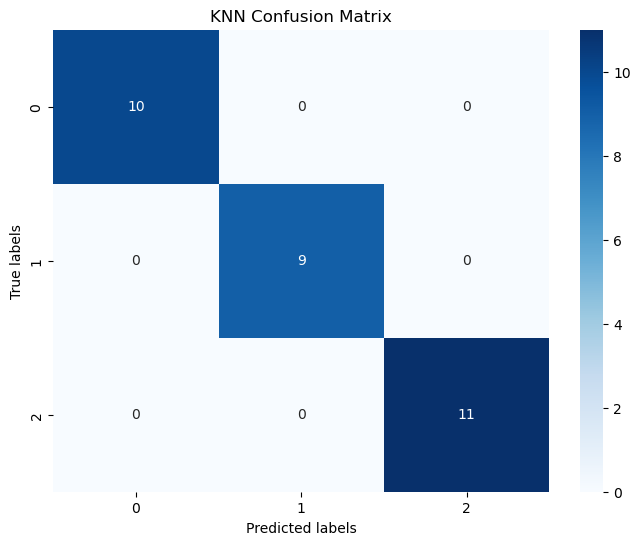

In [17]:
# Plot confusion matrix
plot_confusion_matrix(y_test, knn_pred, "KNN Confusion Matrix")

### KMeans code

In [23]:
score = []

for k in range(2, 20):
    model = KMeans(n_clusters=k, random_state=42).fit(X)
    score.append(silhouette_score(X, model.labels_))
print("Silhouette score:", score)

Silhouette score: [0.6808136202936816, 0.5509643746707443, 0.4974115445023624, 0.4885175508886279, 0.36339909677539595, 0.3594929404796019, 0.3427369577713406, 0.31259234994972657, 0.2870484372612903, 0.27940615761357546, 0.2886671162125611, 0.2817835315942447, 0.28425781656278865, 0.29092264624214315, 0.29233395317155875, 0.30636269993034937, 0.28963766612882363, 0.26628335684646626]
